# Timing squared Euclidean distance matrix functions

This code uses the magic function `%timeit`<sup> 1 2 </sup> to measure the excetution time of functions defined in `sedm.py`.

* <sup> 1 </sup>[Profiling and Timing Code - excerpt from the Python Data Science Handbook by Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html)

* <sup> 2 </sup>[Python documentation - timeit — Measure execution time of small code snippets](https://docs.python.org/3/library/timeit.html)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial as spt
import sedm
from tqdm.notebook import tqdm as tq # produce the progress bar

In [2]:
# number of points forming matrices P and S
N = np.array([10, 50, 100, 300, 500])

In [3]:
# functions in sedm
functions = [sedm.naive, 
             sedm.avoid_sqrt, 
             sedm.vectorized, 
             sedm.naive_numba,
             sedm.avoid_sqrt_numba]

# computational times for functions in sedm + scipy function
times = [[], [], [], [], [], []]

for Ni in tq(N):
    matrix = np.ones((3,Ni))
    for function, time in zip(functions, times):
        t = %timeit -o function(matrix, matrix)
        time.append(t.average)
    t = %timeit -o spt.distance.cdist(matrix.T, matrix.T, 'sqeuclidean')
    times[-1].append(t.average)

1.69 ms ± 13.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
699 µs ± 12.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
41.8 µs ± 40.9 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
34.8 µs ± 6.83 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
15.7 µs ± 5.94 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
21.7 µs ± 201 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
42.1 ms ± 550 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
17.2 ms ± 192 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
73.3 µs ± 485 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
693 µs ± 8.68 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
253 µs ± 722 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
32.1 µs ± 177 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
170 ms ± 4.38 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
69.5 ms ± 673 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
11

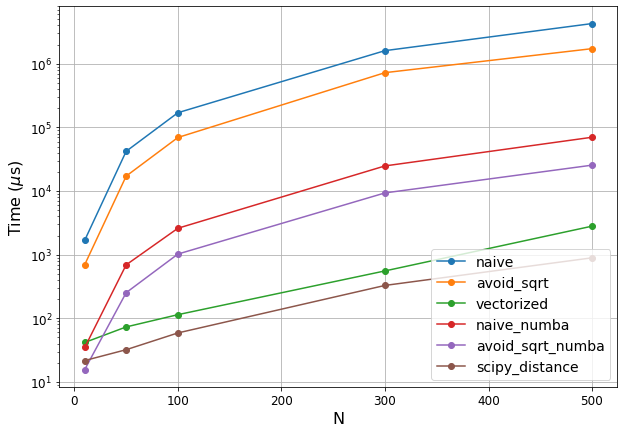

In [4]:
function_names = ['naive', 
                  'avoid_sqrt', 
                  'vectorized', 
                  'naive_numba',
                  'avoid_sqrt_numba',
                  'scipy_distance']

plt.figure(figsize=(10,7))
for function_name, time in zip(function_names, times):
    plt.plot(N, np.asarray(time)*1e6, 'o-', label = function_name)

plt.legend(loc = 'best', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('N', fontsize = 16)
plt.ylabel('Time ($\mu$s)', fontsize = 16)
plt.yscale('log')
plt.grid()
plt.show()